# Алгоритмы в биоинформатике: ДЗ 3
ВШЭ, АДБМ, Зарубин Дмитрий

**Задание 1**
>Написать программу для построения выравнивания алгоритмом Смита-Ватермана. Штрафы за вставки-делеции – линейные (не аффинные). Параметры – премия за совпадение $m = 1$, штраф за замену $mism = 1$, штраф за делецию $d = 1$. Программа должна выдавать собственно выравнивание (последовательности, написанные друг под другом с делециями) и вес выравнивания.

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from random import choices
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
seq1 = "TGTTACGG"
seq2 = "GGTTGACTA"

In [ ]:
def SW_Align(seq1, seq2, match=1, mismatch=-1, gap=-1, details=True):

    def create_matrix(seq1, seq2):
        return np.zeros(shape=(len(seq1)+1, len(seq2)+1))
    
    def score(matrix, i, j):
        diagonal = scoring_matrix[i - 1][j - 1] + (match if seq1[i - 1] == seq2[j - 1] else mismatch)
        vertical = scoring_matrix[i - 1][j] + gap
        horizontal = scoring_matrix[i][j - 1] + gap
        return max(diagonal, vertical, horizontal,0)
    
    def calculate_scores(seq1, seq2):
        matrix = create_matrix(seq1, seq2)
        position   = None
        best_score = 0
        for i in range(1, matrix.shape[0]):
            for j in range(1, matrix.shape[1]):
                diagonal = matrix[i - 1][j - 1] + (match if seq1[i - 1] == seq2[j - 1] else mismatch)
                vertical = matrix[i - 1][j] + gap
                horizontal = matrix[i][j - 1] + gap
                score = max(diagonal, vertical, horizontal, 0)
                if score >= best_score:
                    best_score = score
                    position = (i,j) #позиция макс скора
                matrix[i][j] = score
        if details:
            print('Matrix:\n')
            print(tabulate(pd.DataFrame(matrix, columns=list(' '+seq2), index=list(' '+seq1)), headers=list(' '+seq2), tablefmt='psql'))
        return matrix, position, best_score

    def backtrack(seq1, seq2, matrix, position, match=1, mismatch=-1, deletion=-1):
        align1 = ''
        align2 = ''
        middle = ''
        i, j = position
        while matrix[i][j] != 0:
            if matrix[i][j] == matrix[i - 1][j] + deletion:
                middle += ' '
                align1 = seq1[i - 1] + align1
                align2 = '-' + align2
                i -= 1
            elif matrix[i][j] == matrix[i][j - 1] + deletion:
                middle += ' '
                align1 = '-' + align1
                align2 = seq2[j - 1] + align2            
                j -= 1
            else:
                align1 = seq1[i - 1] + align1
                align2 = seq2[j - 1] + align2
                if align1[0] != align2[0]:
                    middle += ':'
                else:
                    middle += '|'
                i -= 1
                j -= 1
        return align1, middle[::-1], align2

    def print_align(seq1, seq2, score, align1, middle, align2):
        print(f'\nSeq 1: {seq1}\n')
        print(f'Seq 2: {seq2}\n')
        print(f'Local Alignment\n\n\
    Subject 1:\t {align1}\n\
            \t {middle}\n\
    Subject 2:\t {align2}')
        print(f'\nScore:')
    
    alignment_matrix,bt_start, score = calculate_scores(seq1, seq2)
    al1, mid, al2 = backtrack(seq1, seq2, alignment_matrix, bt_start)
    if details:
        print_align(seq1, seq2, score, al1, mid, al2)
    return score

In [ ]:
SW_Align(seq1, seq2, 1, -1, -1)

Matrix:

+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|    |     |   G |   G |   T |   T |   G |   A |   C |   T |   A |
|----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----|
|    |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |
| T  |   0 |   0 |   0 |   1 |   1 |   0 |   0 |   0 |   1 |   0 |
| G  |   0 |   1 |   1 |   0 |   0 |   2 |   1 |   0 |   0 |   0 |
| T  |   0 |   0 |   0 |   2 |   1 |   1 |   1 |   0 |   1 |   0 |
| T  |   0 |   0 |   0 |   1 |   3 |   2 |   1 |   0 |   1 |   0 |
| A  |   0 |   0 |   0 |   0 |   2 |   2 |   3 |   2 |   1 |   2 |
| C  |   0 |   0 |   0 |   0 |   1 |   1 |   2 |   4 |   3 |   2 |
| G  |   0 |   1 |   1 |   0 |   0 |   2 |   1 |   3 |   3 |   2 |
| G  |   0 |   1 |   2 |   1 |   0 |   1 |   1 |   2 |   2 |   2 |
+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

Seq 1: TGTTACGG

Seq 2: GGTTGACTA

Local Alignment

    Subject 1:	 GTT-AC
            	 ||| ||
    Subject 2:	 GTTGAC


4.0

**Задание 2**
>Провести тестирование программы на понятных примерах – когда последовательности совпадают, когда последовательности имеют 1..3 замены, 1..3 делеции. Поскольку ищется локальное выравнивание, то в тесте должны быть варианты, когда начала и/или концы последовательностей разные.

In [ ]:
SW_Align('GGATAT','GGTTAT')

Matrix:

+----+-----+-----+-----+-----+-----+-----+-----+
|    |     |   G |   G |   T |   T |   A |   T |
|----+-----+-----+-----+-----+-----+-----+-----|
|    |   0 |   0 |   0 |   0 |   0 |   0 |   0 |
| G  |   0 |   1 |   1 |   0 |   0 |   0 |   0 |
| G  |   0 |   1 |   2 |   1 |   0 |   0 |   0 |
| A  |   0 |   0 |   1 |   1 |   0 |   1 |   0 |
| T  |   0 |   0 |   0 |   2 |   2 |   1 |   2 |
| A  |   0 |   0 |   0 |   1 |   1 |   3 |   2 |
| T  |   0 |   0 |   0 |   1 |   2 |   2 |   4 |
+----+-----+-----+-----+-----+-----+-----+-----+

Seq 1: GGATAT

Seq 2: GGTTAT

Local Alignment

    Subject 1:	 GGATAT
            	 ||:|||
    Subject 2:	 GGTTAT

Score:


4.0

In [ ]:
SW_Align('CG','CG')

Matrix:

+----+-----+-----+-----+
|    |     |   C |   G |
|----+-----+-----+-----|
|    |   0 |   0 |   0 |
| C  |   0 |   1 |   0 |
| G  |   0 |   0 |   2 |
+----+-----+-----+-----+

Seq 1: CG

Seq 2: CG

Local Alignment

    Subject 1:	 CG
            	 ||
    Subject 2:	 CG

Score:


2.0

In [ ]:
SW_Align('CGGGGGAC','AATGGGTC')

Matrix:

+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|    |     |   A |   A |   T |   G |   G |   G |   T |   C |
|----+-----+-----+-----+-----+-----+-----+-----+-----+-----|
|    |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |
| C  |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   1 |
| G  |   0 |   0 |   0 |   0 |   1 |   1 |   1 |   0 |   0 |
| G  |   0 |   0 |   0 |   0 |   1 |   2 |   2 |   1 |   0 |
| G  |   0 |   0 |   0 |   0 |   1 |   2 |   3 |   2 |   1 |
| G  |   0 |   0 |   0 |   0 |   1 |   2 |   3 |   2 |   1 |
| G  |   0 |   0 |   0 |   0 |   1 |   2 |   3 |   2 |   1 |
| A  |   0 |   1 |   1 |   0 |   0 |   1 |   2 |   2 |   1 |
| C  |   0 |   0 |   0 |   0 |   0 |   0 |   1 |   1 |   3 |
+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

Seq 1: CGGGGGAC

Seq 2: AATGGGTC

Local Alignment

    Subject 1:	 GGGAC
            	 |||:|
    Subject 2:	 GGGTC

Score:


3.0

In [ ]:
SW_Align('GGGGGAACGGG','GGGGTTAAA')

Matrix:

+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|    |     |   G |   G |   G |   G |   T |   T |   A |   A |   A |
|----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----|
|    |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |
| G  |   0 |   1 |   1 |   1 |   1 |   0 |   0 |   0 |   0 |   0 |
| G  |   0 |   1 |   2 |   2 |   2 |   1 |   0 |   0 |   0 |   0 |
| G  |   0 |   1 |   2 |   3 |   3 |   2 |   1 |   0 |   0 |   0 |
| G  |   0 |   1 |   2 |   3 |   4 |   3 |   2 |   1 |   0 |   0 |
| G  |   0 |   1 |   2 |   3 |   4 |   3 |   2 |   1 |   0 |   0 |
| A  |   0 |   0 |   1 |   2 |   3 |   3 |   2 |   3 |   2 |   1 |
| A  |   0 |   0 |   0 |   1 |   2 |   2 |   2 |   3 |   4 |   3 |
| C  |   0 |   0 |   0 |   0 |   1 |   1 |   1 |   2 |   3 |   3 |
| G  |   0 |   1 |   1 |   1 |   1 |   0 |   0 |   1 |   2 |   2 |
| G  |   0 |   1 |   2 |   2 |   2 |   1 |   0 |   0 |   1 |   1 |
| G  |   0 |   1 |   2 |   3 |   3 |   2 |   1 |   0 

4.0

**Задание 3**
>Бонус (начисляются дополнительные баллы): исследовать поведение веса выравнивания случайных независимых последовательностей от их длины.

In [ ]:
def test(length, count):
    def random_seq(length):
        return ''.join(choices(population=['A', 'C', 'T', 'G'], k=length))
    return sum([SW_Align(random_seq(length),  random_seq(length), details=False) for i in range(count)])/count

In [ ]:
lengths = list(range(1, 50))
scores = [test(length, 50) for length in lengths]

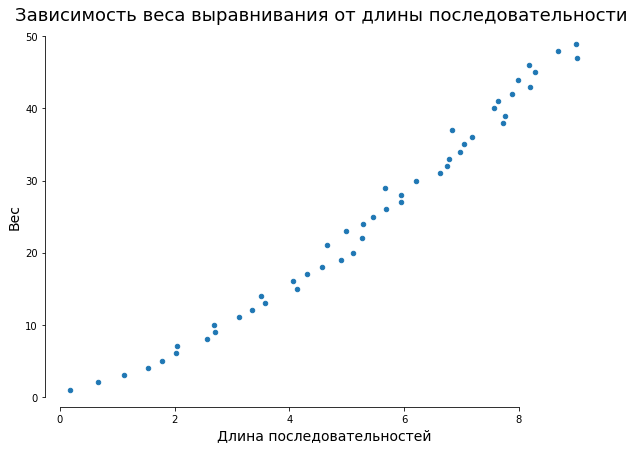

In [ ]:
title_font = {'size':'18', 'color':'black', 'weight':'normal'}
axis_font = {'size':'14', 'color':'black', 'weight':'normal'}
plt.figure(figsize=(10,7))
plt.scatter(scores, lengths, s=20)
sns.despine(trim=True)
plt.xlabel('Длина последовательностей', **axis_font)
plt.ylabel('Вес', **axis_font)
plt.title('Зависимость веса выравнивания от длины последовательности ', **title_font)
plt.show()